In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

if torch.cuda.is_available():
    device=torch.device("cuda")
    print("check")
    x=torch.ones(5, device=device)
    y=torch.ones(5)
    y=y.to(device)
    z=x+y
    #z=z.to("cpu")
    #z.numpy()
    print(z)


check
tensor([2., 2., 2., 2., 2.], device='cuda:0')


In [31]:
import torch

x=torch.tensor(1.0)
y=torch.tensor(2.0)

w=torch.tensor(3.0,requires_grad=True)

y_hat=w*x
loss=(y_hat-y)**2
print(loss)

#backward pass
loss.backward()
print(w.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(2.)


In [1]:
import numpy as np
#f=w*x
#f=2*x

X=np.array([1,2,3,4], dtype=np.float32)
Y=np.array([2,4,6,8], dtype=np.float32)

w=0.0
#model prediction
def forward(x):
    return w*x;

#loss
def loss(y,y_predicted):
    return ((y_predicted-y)**2).mean()

#gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw= 1/N * 2x * (w*x - y)

def gradient(x,y,y_predicted):
    return np.dot(2*x,y_predicted-y).mean()

print(f'prediction before training: f(5)= {forward(5):.3f}')

#train
learning_rate= 0.01
n_iters=20

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred= forward(X)

    #loss
    l=loss(Y,y_pred)
    
    #gradients
    dw= gradient(X,Y,y_pred)

    #update weights
    w-=learning_rate*dw
    
    if epoch%1==0:
        print(f'epoch {epoch+1}:w ={w:.3f}, loss= {l:.8f}')
print(f'Prediction after training :f(5) = {forward(7):.3f}')


prediction before training: f(5)= 2000.000
epoch 1:w =161.200, loss= 1188030.00000000
epoch 2:w =65.680, loss= 190084.78125000
epoch 3:w =27.472, loss= 30413.56835938
epoch 4:w =12.189, loss= 4866.17089844
epoch 5:w =6.076, loss= 778.58715820
epoch 6:w =3.630, loss= 124.57394409
epoch 7:w =2.652, loss= 19.93183136
epoch 8:w =2.261, loss= 3.18909311
epoch 9:w =2.104, loss= 0.51025498
epoch 10:w =2.042, loss= 0.08164060
epoch 11:w =2.017, loss= 0.01306249
epoch 12:w =2.007, loss= 0.00209002
epoch 13:w =2.003, loss= 0.00033440
epoch 14:w =2.001, loss= 0.00005351
epoch 15:w =2.000, loss= 0.00000856
epoch 16:w =2.000, loss= 0.00000137
epoch 17:w =2.000, loss= 0.00000022
epoch 18:w =2.000, loss= 0.00000004
epoch 19:w =2.000, loss= 0.00000001
epoch 20:w =2.000, loss= 0.00000000
Prediction after training :f(5) = 14.000


In [6]:
import torch
#f=w*x
#f=2*x

X=torch.tensor([1,2,3,4], dtype=torch.float32)
Y=torch.tensor([2,4,6,8], dtype=torch.float32)

w=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
#model prediction
def forward(x):
    return w*x;

#loss
def loss(y,y_predicted):
    return ((y_predicted-y)**2).mean()

#gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw= 1/N * 2x * (w*x - y)

print(f'prediction before training: f(5)= {forward(5):.3f}')

#train
learning_rate= 0.01
n_iters=100

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred= forward(X)

    #loss
    l=loss(Y,y_pred)
    
    #gradients=backward pass
    l.backward()

    #update weights
    with torch.no_grad():
        w-=learning_rate*w.grad
    
    #zero gradients
    w.grad.zero_()

    if epoch%10==0:
        print(f'epoch {epoch+1}:w ={w:.3f}, loss= {l:.8f}')
print(f'Prediction after training :f(5) = {forward(7):.3f}')


prediction before training: f(5)= 0.000
epoch 1:w =0.300, loss= 30.00000000
epoch 11:w =1.665, loss= 1.16278565
epoch 21:w =1.934, loss= 0.04506890
epoch 31:w =1.987, loss= 0.00174685
epoch 41:w =1.997, loss= 0.00006770
epoch 51:w =1.999, loss= 0.00000262
epoch 61:w =2.000, loss= 0.00000010
epoch 71:w =2.000, loss= 0.00000000
epoch 81:w =2.000, loss= 0.00000000
epoch 91:w =2.000, loss= 0.00000000
Prediction after training :f(5) = 14.000


In [24]:
#1. Design model (input, output size, forward pass)
#2. Construct loss and optimizer
#3. Training loop

#Pytorch pipeline

import torch
import torch.nn as nn 
import time 

X=torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y=torch.tensor([[2],[4],[6],[9]], dtype=torch.float32)

X_test=torch.tensor([5], dtype=torch.float32)
n_samples, n_features=X.shape
print(n_samples,n_features)

input_size=n_features
output_size=n_features

#model= nn.Linear(input_size,output_size)

class LinearRegression(nn.Module):

    def __init__(self,input_dim, output_dim):
        super(LinearRegression, self).__init__()
        #define layers
        self.lin= nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)
    
model= LinearRegression(input_size, output_size)


print(f'prediction before training: f(5)= {model(X_test).item():.3f}')

#train
learning_rate= 0.01
n_iters=100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
start= time.time()
for epoch in range(n_iters):
    #prediction = forward pass
    y_pred= model(X)

    #loss
    l=loss(Y,y_pred)
    
    #gradients=backward pass
    l.backward()

    #update weights
    optimizer.step()
    
    #zero gradients
    optimizer.zero_grad()

    if epoch%10==0:
        [w, b]= model.parameters()
        print(f'epoch {epoch+1}:w ={w[0][0].item():.3f}, loss= {l:.8f}')
print(f'Prediction after training :f(5) = {model(X_test).item():.3f}')
end=time.time()
print(f'time taken is -> {(end-start):.3f}')
print("done")

4 1
prediction before training: f(5)= -3.414
epoch 1:w =-0.377, loss= 56.78449249
epoch 11:w =1.357, loss= 2.07409954
epoch 21:w =1.652, loss= 0.62765229
epoch 31:w =1.714, loss= 0.56107229
epoch 41:w =1.738, loss= 0.53189045
epoch 51:w =1.755, loss= 0.50527346
epoch 61:w =1.772, loss= 0.48022902
epoch 71:w =1.787, loss= 0.45664245
epoch 81:w =1.803, loss= 0.43442911
epoch 91:w =1.817, loss= 0.41350842
Prediction after training :f(5) = 10.032
time taken is -> 0.031
done


epoch 10, loss= 4397.6357
epoch 20, loss= 3282.9006
epoch 30, loss= 2475.6409
epoch 40, loss= 1890.4598
epoch 50, loss= 1465.8682
epoch 60, loss= 1157.5322
epoch 70, loss= 933.4430
epoch 80, loss= 770.4635
epoch 90, loss= 651.8497
epoch 100, loss= 565.4713
epoch 110, loss= 502.5327
epoch 120, loss= 456.6494
epoch 130, loss= 423.1843
epoch 140, loss= 398.7659
epoch 150, loss= 380.9415
epoch 160, loss= 367.9256
epoch 170, loss= 358.4181
epoch 180, loss= 351.4712
epoch 190, loss= 346.3940
epoch 200, loss= 342.6821
epoch 210, loss= 339.9679
epoch 220, loss= 337.9829
epoch 230, loss= 336.5309
epoch 240, loss= 335.4685
epoch 250, loss= 334.6911
epoch 260, loss= 334.1222
epoch 270, loss= 333.7058
epoch 280, loss= 333.4011
epoch 290, loss= 333.1779
epoch 300, loss= 333.0146
epoch 310, loss= 332.8950
epoch 320, loss= 332.8073
epoch 330, loss= 332.7432
epoch 340, loss= 332.6962
epoch 350, loss= 332.6618
epoch 360, loss= 332.6366
epoch 370, loss= 332.6181
epoch 380, loss= 332.6046
epoch 390, loss

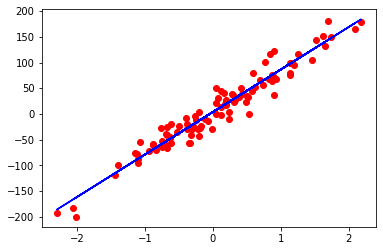

In [28]:
import torch
import torch.nn as nn
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt

#0. prep data

X_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
X= torch.from_numpy(X_numpy.astype(np.float32))
y= torch.from_numpy(y_numpy.astype(np.float32))
y=y.view(y.shape[0], 1)

n_samples, n_features= X.shape

#1. model
input_size=n_features
output_size=1
model= nn.Linear(input_size, output_size)

#2. loss
criterion= nn.MSELoss()
learning_rate=0.01
optimizer= torch.optim.SGD(model.parameters(),lr=learning_rate)

#3. training loop
num_epochs=1000
for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted= model(X)
    loss = criterion(y_predicted,y)

    #backward pass
    loss.backward()

    #update
    optimizer.step()

    optimizer.zero_grad()

    if (epoch+1)%10 == 0:
        print(f'epoch {epoch+1}, loss= {loss.item():.4f}')
#plot
predicted= model(X).detach().numpy()
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy,predicted, 'b')
plt.show()